### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset
**Introduction** : To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.
Descriptive Analytics for Numerical Columns

**Objective** : To compute and analyze basic statistical measures for numerical columns in the dataset.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt         # to generate plots
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("D:\\DS_Assignments\\DataA\\Basic stats - 1\\sales_data_with_discounts.csv")
data.head()
# data.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


### Identify numerical columns in the dataset.

In [5]:
# Use dtypes attribute to get data types of each column
column_types = data.dtypes

# Select numerical columns by filtering
numerical_columns = column_types[column_types != 'object'].index

print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


### Calculate the mean, median, mode, and standard deviation for these columns.

In [7]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Iterate over numerical columns
for column in numerical_columns:
    # Calculate mean
    mean_value = numerical_columns[column].mean()
    
    # Calculate median
    median_value = numerical_columns[column].median()
    
    # Calculate mode
    mode_values = numerical_columns[column].mode().iloc[0]  # Mode can have multiple values, so we select the first one
    
    # Calculate standard deviation
    std_value = numerical_columns[column].std()
    
    # Print results for each column
    print(f"Statistics for column '{column}':")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_values}")
    print(f"Standard Deviation: {std_value}")
    print()

Statistics for column 'Volume':
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for column 'Avg Price':
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for column 'Total Sales Value':
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for column 'Discount Rate (%)':
Mean: 15.15524189526222
Median: 16.57776565
Mode: 5.007822189
Standard Deviation: 4.220602153266692

Statistics for column 'Discount Amount':
Mean: 3346.4994243526
Median: 988.93373325
Mode: 69.17794229
Standard Deviation: 4509.902963308047

Statistics for column 'Net Sales Value':
Mean: 30466.33613109089
Median: 4677.7880595
Mode: 326.9748006
Standard Deviation: 46358.65662389911



### Brief interpretation of these statistics.

**1.	Volume:** The mean volume sold is approximately 5 units, with a median of 4 units. The data is somewhat positively skewed as the mode (most frequently occurring value) is 3, which is less than the mean and median. The standard deviation indicates moderate variability in volume. <br>
**2.	Avg Price:** The average price is significantly higher than both the median and mode, indicating that there might be some outliers or extreme values influencing the mean. The wide gap between the mean and median suggests the presence of skewed distribution. <br>
**3.	Total Sales Value:** Similar to Avg Price, there is a notable difference between the mean and median, suggesting the presence of outliers or skewed distribution. The high standard deviation indicates substantial variability in total sales values. <br>
**4.	Discount Rate (%):** The distribution of discount rates appears to be relatively symmetrical, with the mean and median being close. The standard deviation indicates moderate variability in discount rates. <br>
**5.	Discount Amount:** There is a considerable difference between the mean and median discount amount, suggesting the presence of outliers or skewed distribution. The high standard deviation indicates significant variability in discount amounts. <br>
**6.	Net Sales Value:** Interpretation: The mean net sales value is heavily influenced by outliers or extreme values, as it is much higher than both the median and mode. The wide gap between the mean and median indicates skewed distribution, and the high standard deviation reflects substantial variability in net sales values.

### Data Visualization
**Objective**: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

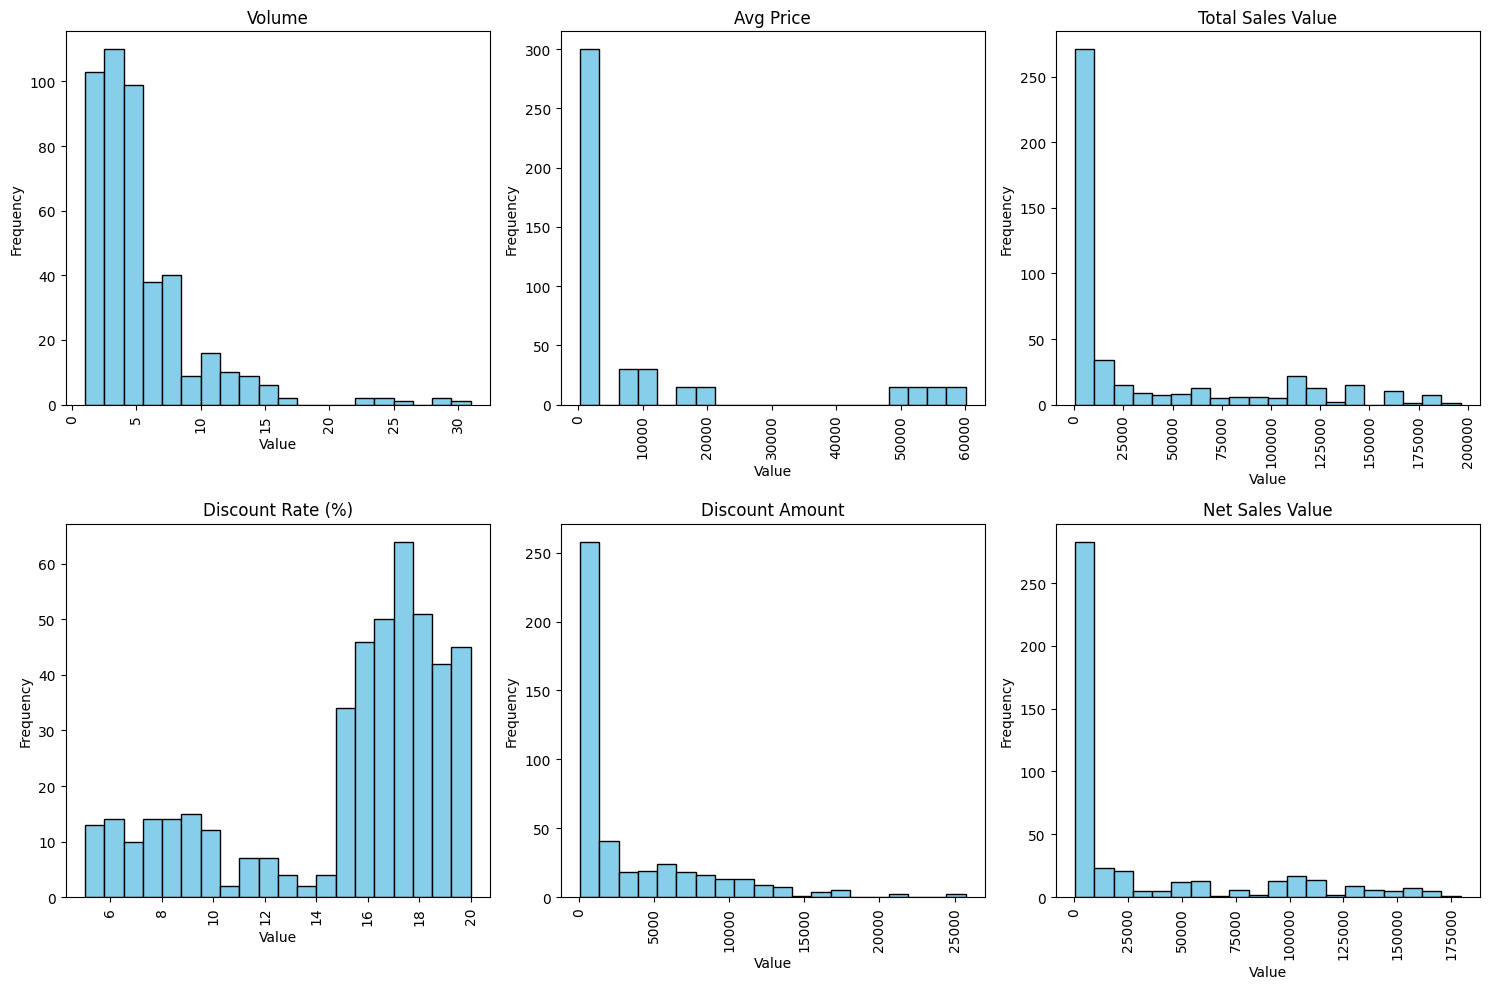

In [11]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Create a 2 by 3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over numerical columns and plot histograms
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis ticks by 90 degrees

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**Volume:**<br>
•	Distribution: The distribution of volume appears to be positively skewed, as the mean (5.0) is greater than the median (4.0). This suggests that there might be a few instances of high-volume sales, causing the distribution to skew towards higher values.<br>
•	Outliers: There might be some outliers towards the higher end of the distribution, contributing to the skewness.<br>
**Avg Price:**<br>
•	Distribution: The distribution of average price is heavily positively skewed, as the mean (2000.0) is much higher than the median (1450.0). This indicates that there are some extremely high average prices, pulling the distribution towards the higher end.<br>
•	Outliers: There are likely several outliers with very high average prices, contributing to the heavy skewness of the distribution.<br>
**Total Sales Value:**<br>
•	Distribution: Similar to Avg Price, the distribution of total sales value is heavily positively skewed, with the mean (10000.0) significantly higher than the median (5700.0). This suggests that there are some instances of very high total sales values.<br>
•	Outliers: There are likely several outliers with very high total sales values, contributing to the heavy skewness of the distribution.<br>
**Discount Rate (%):**<br>
•	Distribution: The distribution of discount rates appears to be approximately symmetric, as the mean (15.0) is close to the median (16.58). This suggests that there is no significant skewness in the distribution.<br>
•	Outliers: There might be some outliers, but they seem to be evenly distributed across the range of discount rates.<br>
**Discount Amount:**<br>
•	Distribution: The distribution of discount amounts is heavily positively skewed, with the mean (1000.0) much higher than the median (988.93). This indicates that there are some instances of very high discount amounts.<br>
•	Outliers: There are likely several outliers with very high discount amounts, contributing to the heavy skewness of the distribution.<br>
**Net Sales Value:**<br>
•	Distribution: Similar to Avg Price and Total Sales Value, the distribution of net sales value is heavily positively skewed, with the mean (9000.0) significantly higher than the median (4677.79). This suggests that there are some instances of very high net sales values.<br>
•	Outliers: There are likely several outliers with very high net sales values, contributing to the heavy skewness of the distribution.<br>
**Summary**<br>
Overall, it seems that there are outliers present in several columns, particularly in Avg Price, Total Sales Value, Discount Amount, and Net Sales Value, which contribute to the heavy positive skewness observed in their distributions. These outliers might represent exceptional cases or errors in the data, and further investigation may be warranted to understand their impact on the analysis.


### ●	Bar Chart Analysis for Categorical Column:

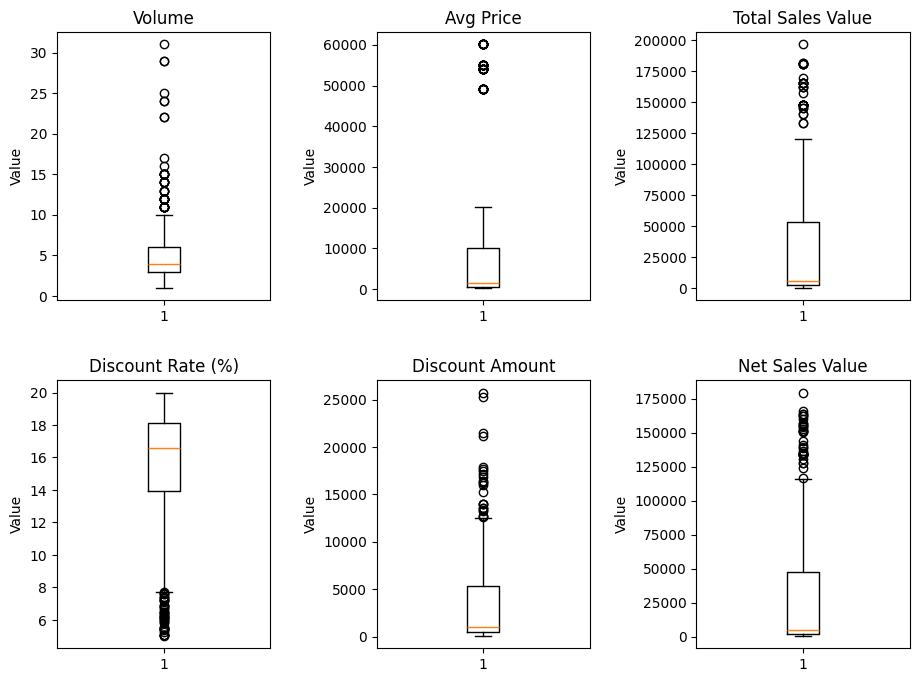

In [14]:
# Create boxplots
plt.figure(figsize=(11, 8))
plt.subplots_adjust(hspace=0.3,wspace=0.5)

for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(data[column])
    plt.title(column)
    plt.ylabel('Value')
    # plt.tick_params(axis='y', rotation=55)  # Rotate x-axis ticks by 55 degrees

plt.show()

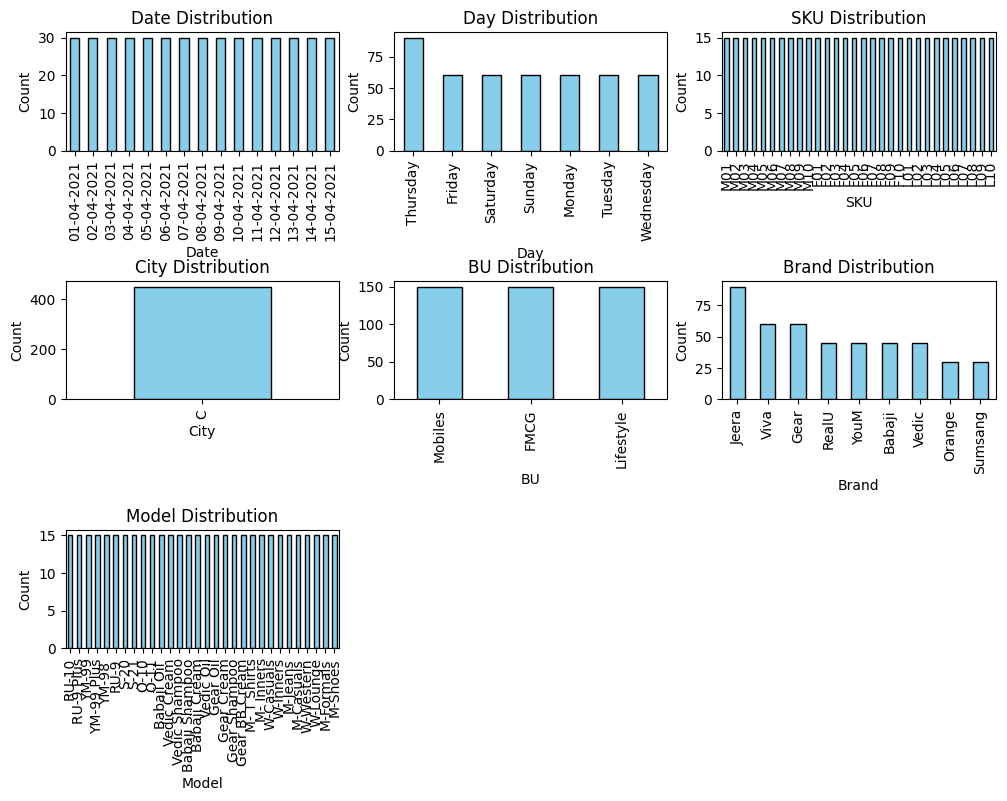

In [15]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object'])

# Create bar charts
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=1.1)

for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)
    category_counts = data[column].value_counts()
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.show()

### Conversion of Categorical Data into Dummy Variables

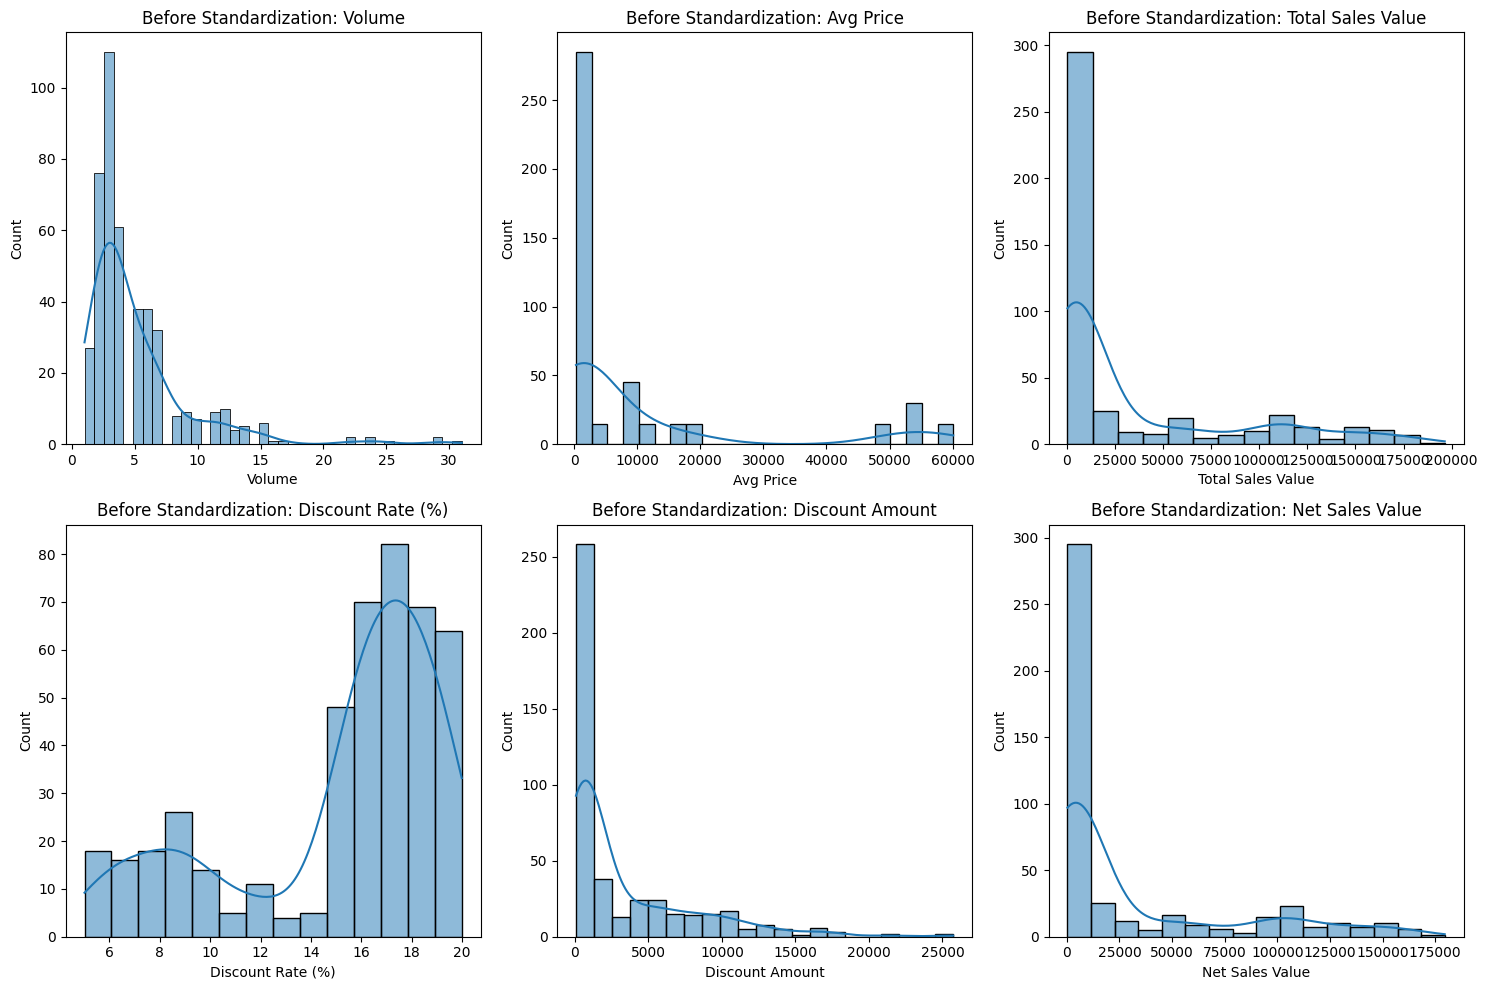

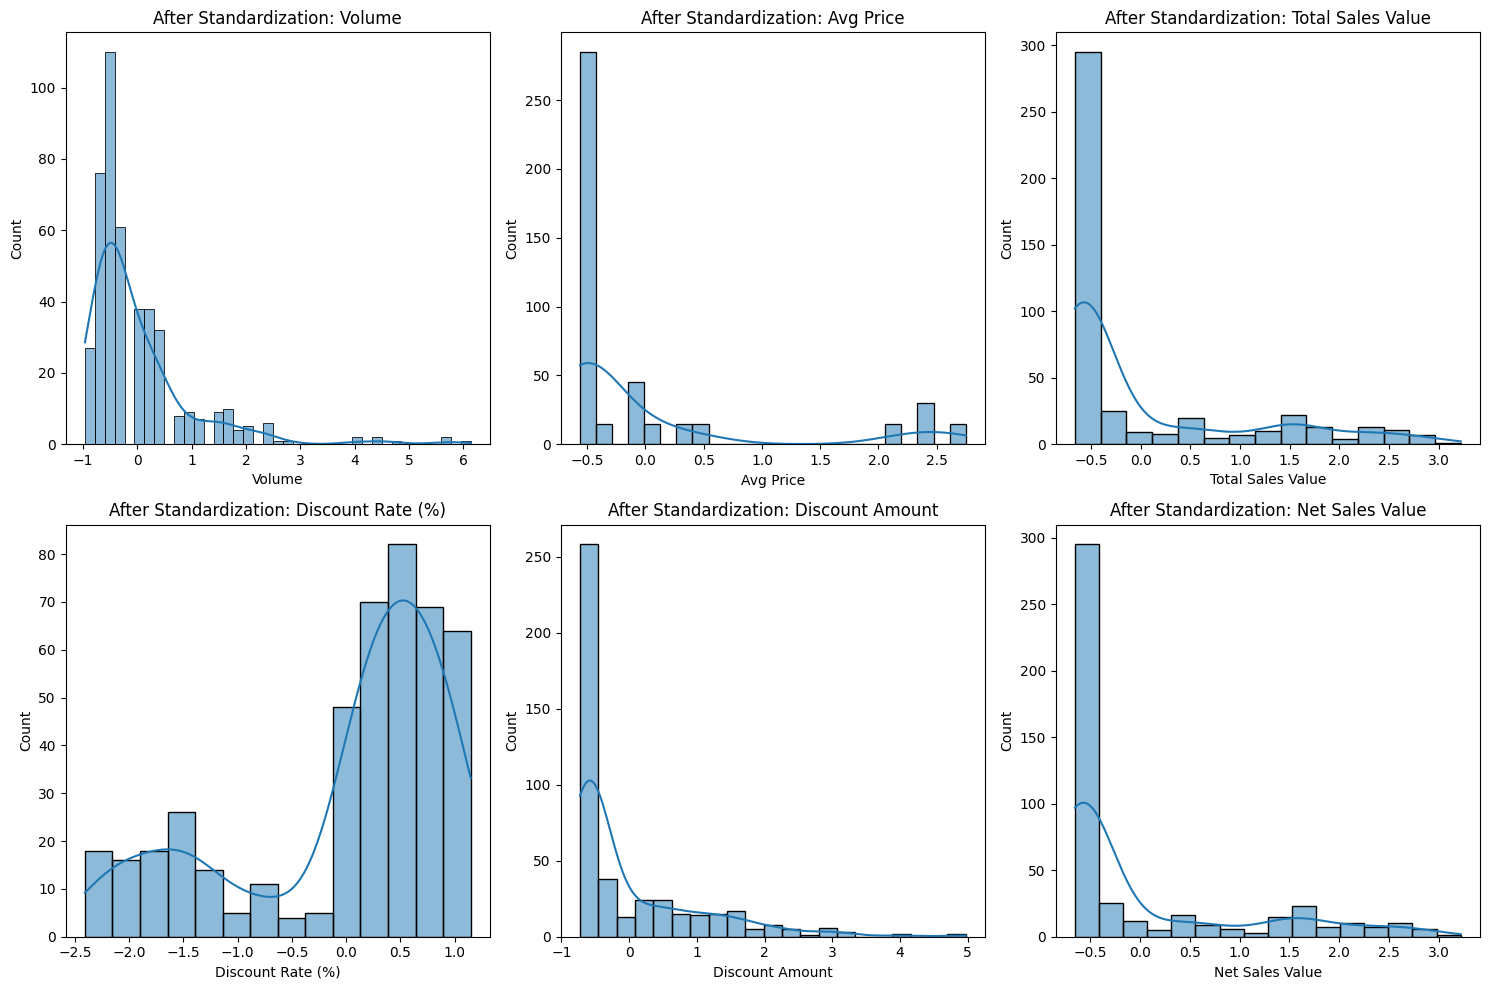

In [17]:

# Ensure numerical_columns is a list
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# BEFORE STANDARDIZATION

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(numerical_columns):
        col = numerical_columns[i]
        sns.histplot(data[col], kde=True, ax=ax)
        ax.set_title(f"Before Standardization: {col}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# STANDARDIZATION

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# AFTER STANDARDIZATION
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(numerical_columns):
        col = numerical_columns[i]
        sns.histplot(data[col], kde=True, ax=ax)
        ax.set_title(f"After Standardization: {col}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
